<a href="https://www.kaggle.com/code/traitor69/eda-for-low-sales-of-used-cars?scriptVersionId=128664409" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### In this project, I'm going to show my observations for how price of the car is affected by different parameters involved while a customer purchases it. Let's start with importing the libraries we need to do EDA.

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
## to ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading Dataset

In [2]:
## Import the data set using panda libraries.
df = pd.read_csv('/kaggle/input/used-cars-data/used_cars_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [3]:
## Check for the columns that are not required for the analysis and drop those columns.
df = df.drop(['S.No.'], axis = 1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


#### Check for Duplication

In [4]:
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 382
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [5]:
## Checking for the total null values in the data.
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

## Feature Engineering
#### Using this feature we can convert the raw data into meaningful data

In [6]:
## We want to know car age so that we can see the impact of age of car on price of it.
from datetime import date
date.today().year
df['car_age'] = date.today().year - df['Year']
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10


In [7]:
## From Name column we want brand and model.
df['brand'] = df.Name.str.split().str.get(0)
df['model'] = df.Name.str.split().str.get(1) + df.Name.str.split().str.get(2)
df[['Name','brand','model']]

,Name,brand,model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [8]:
## Check for the unique values in columns to see if there is any wrong value.
print(df.brand.unique())
print(df.brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


#### From the above list we can see that we have some enteries as ISUZU instead of Isuzu. Mini Cooper it should be instead of Mini and Land Rover instead of Land.

In [9]:
searchfor = ['Isuzu','ISUZU','Mini','Land']
df[df.brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_age,brand,model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,27.00,9,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,NaN,17.50,11,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,NaN,23.00,6,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,NaN,55.76,5,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,44.28,35.67,6,Mini,CooperConvertible


In [10]:
df['brand'].replace({'ISUZU':'Isuzu','Land':'Land Rover','Mini':'Mini Cooper'},inplace=True)

## Exploratory Data Analysis

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765216,53.493553,34.2,75.0,94.0,138.1,616.0


In [12]:
## Separating Categorical and Numerical columns
cat_cols = df.select_dtypes(include='object').columns.to_list()
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Categorical Columns:")
print(cat_cols)
print("Numerical Columns:")
print(num_cols)

Categorical Columns:
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'brand', 'model']
Numerical Columns:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'car_age']


## EDA Univariate Analysis
#### Analyzing/visualizing the dataset by taking one variable at a time:

Year
Skew : -0.84


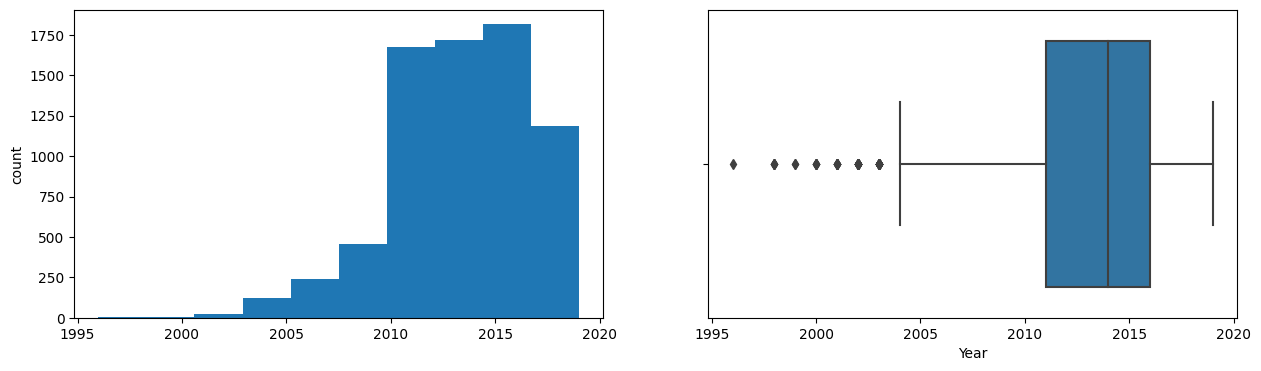

Kilometers_Driven
Skew : 61.58


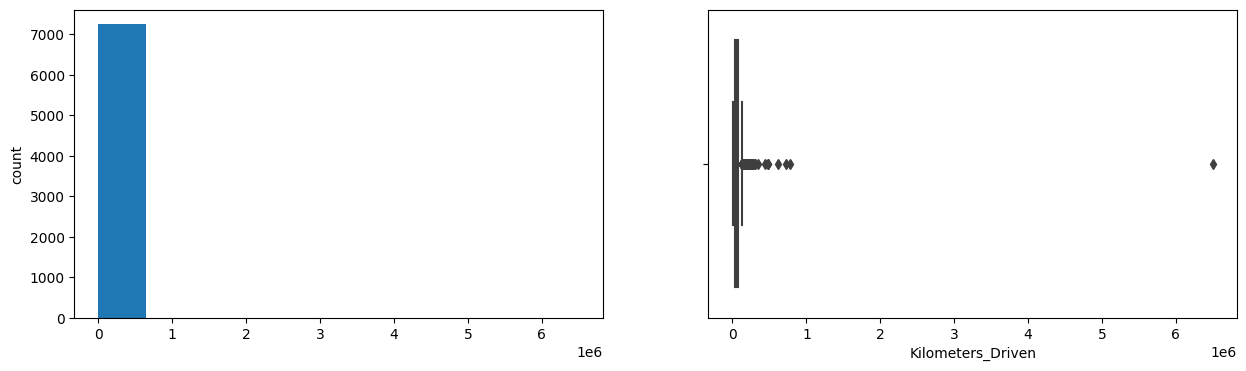

Mileage
Skew : -0.44


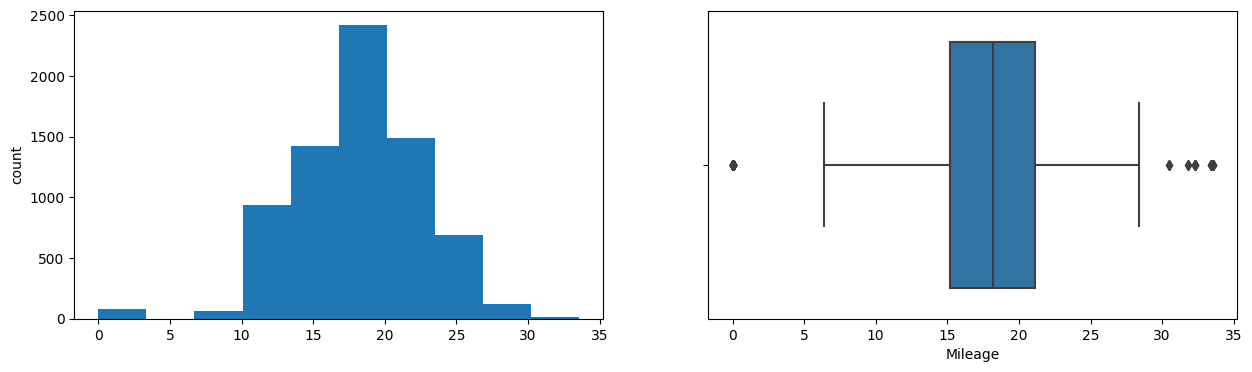

Engine
Skew : 1.41


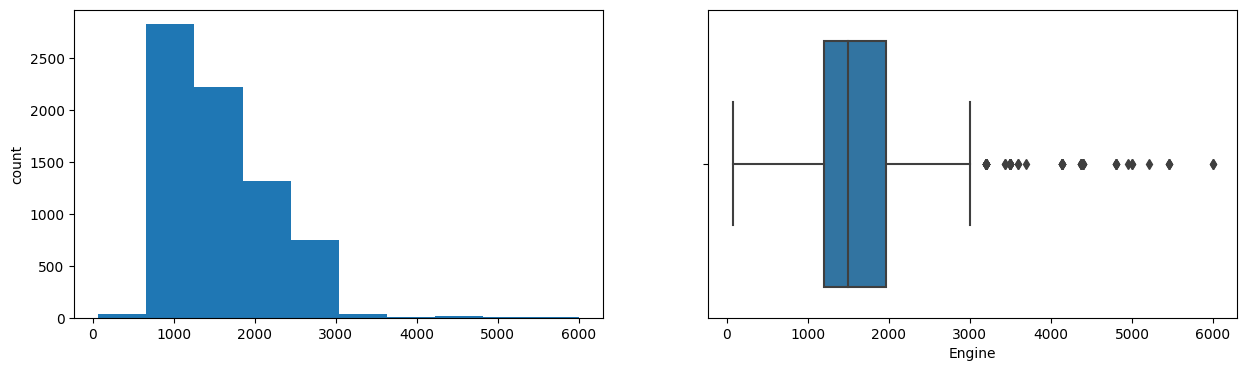

Power
Skew : 1.96


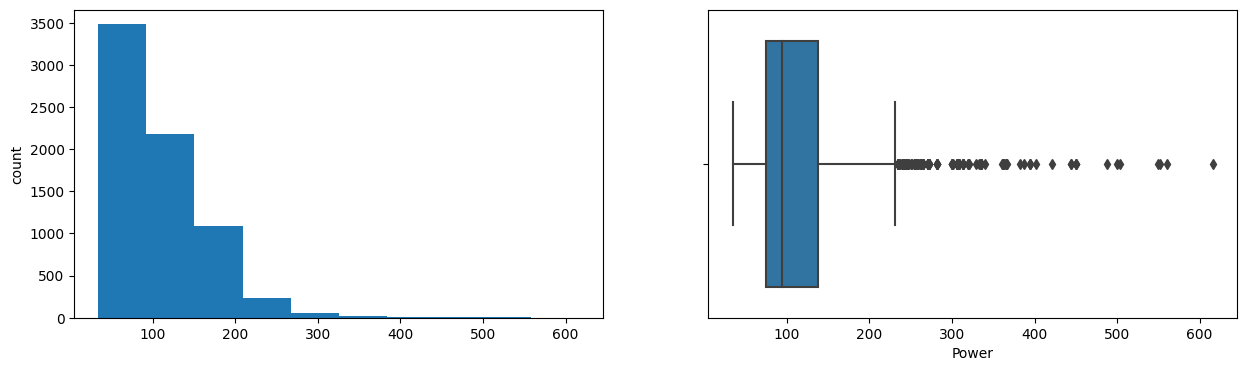

Seats
Skew : 1.9


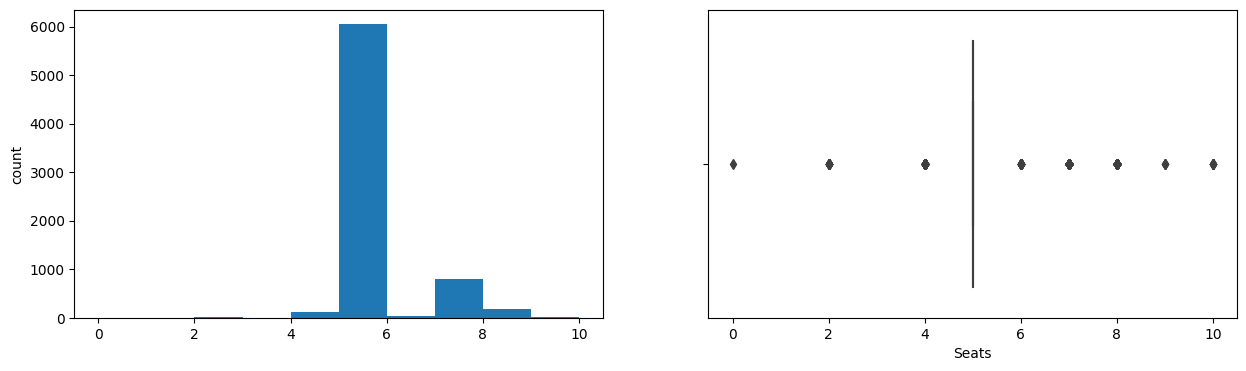

New_Price
Skew : 1.84


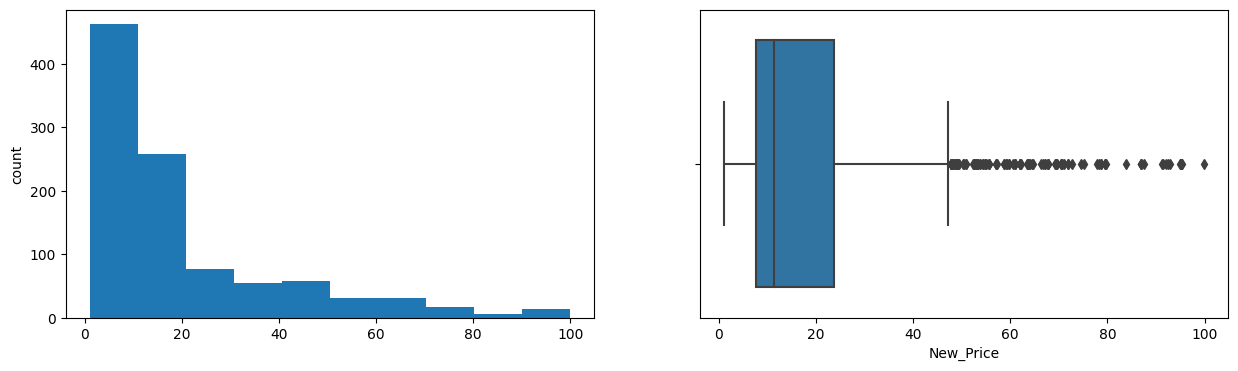

Price
Skew : 3.34


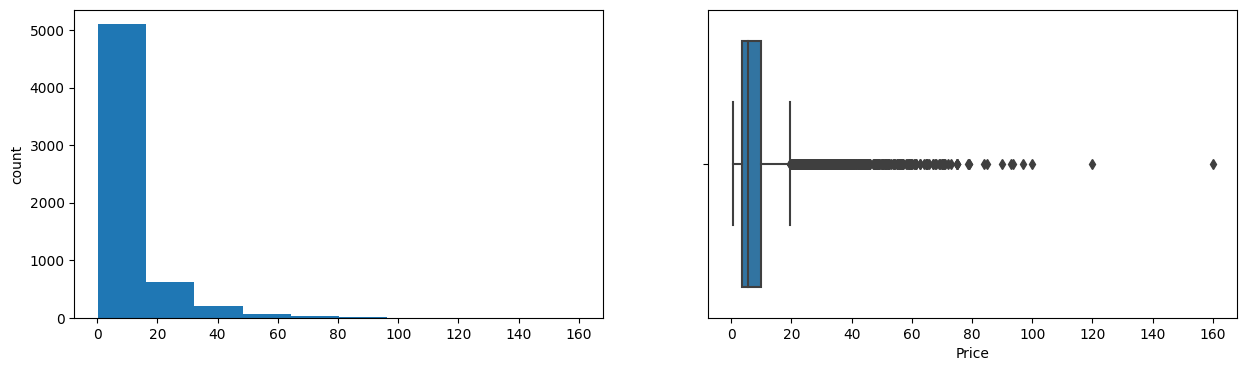

car_age
Skew : 0.84


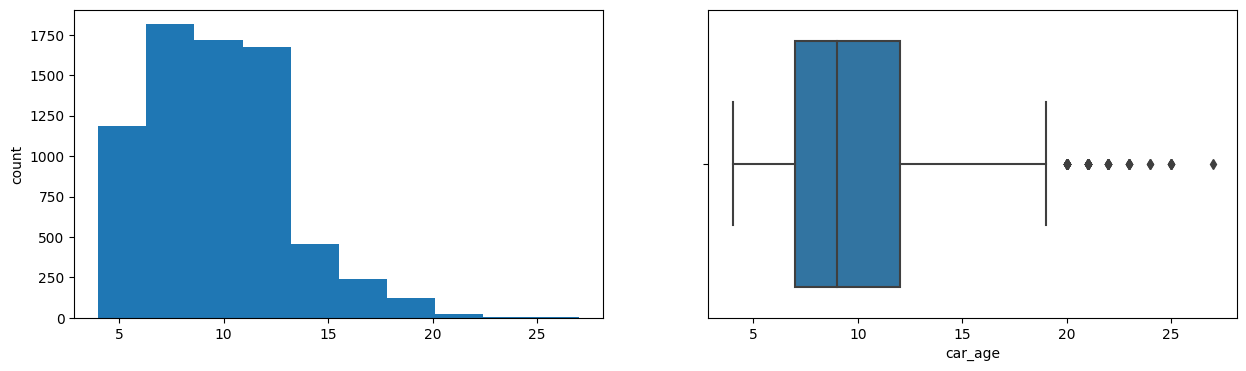

In [13]:
## Plot to identify the outliers.
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    ## Skewness is a measure of lack of symmetry. 
    ## It is a shape parameter that characterizes the degree of asymmetry of a distribution. 
    ## A distribution is said to be positively skewed with a degree of skewness greater than 0 
    ## when the tail of a distribution is toward the high values indicating an excess of low values.
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

#### As you can see from the above graphs that for Kilometers_Driven, Price and Power skewness is pretty high and using log transformation we can rectify these higher skewness.

In [14]:
## Visualization as to how the log transform works
log_kms = np.log(df['Kilometers_Driven'])
print(log_kms.head())
df['Kilometers_Driven'].head()

0    11.184421
1    10.621327
2    10.736397
3    11.373663
4    10.613246
Name: Kilometers_Driven, dtype: float64


0    72000
1    41000
2    46000
3    87000
4    40670
Name: Kilometers_Driven, dtype: int64

<AxesSubplot: >

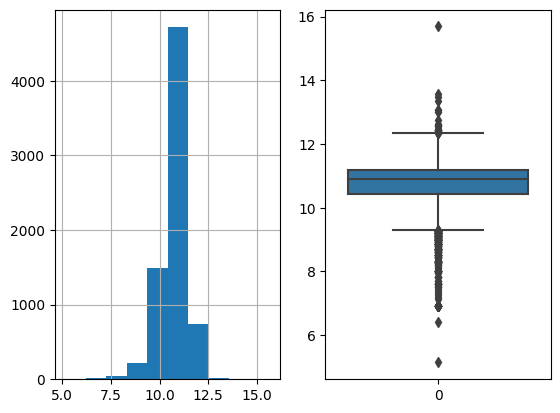

In [15]:
plt.subplot(1,2,1,)
log_kms.hist()
plt.subplot(1,2,2)
sns.boxplot(log_kms)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   float64
 8   Engine                 7207 non-null   float64
 9   Power                  7078 non-null   float64
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   float64
 12  Price                  6019 non-null   float64
 13  car_age                7253 non-null   int64  
 14  brand                  7253 non-null   object 
 15  mode

<AxesSubplot: xlabel='Price_Log', ylabel='Density'>

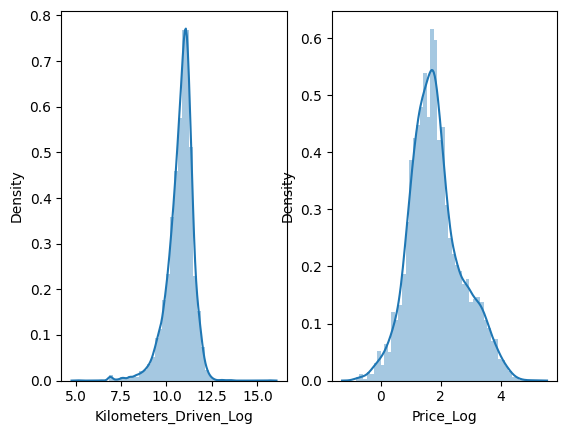

In [16]:
# Function for log transformation of the column
def log_transform(df,col):
    for colname in col:
        if(df[colname]==1.0).all():
            df[colname + '_log'] = np.log(df[colname]+1)
        else:
            df[colname + '_log'] = np.log(df[colname])
    df.info()
log_transform(df,['Kilometers_Driven','Price'])
#Log transformation of the feature 'Kilometers_Driven'
plt.subplot(1,2,1)
sns.distplot(df["Kilometers_Driven_log"],axlabel="Kilometers_Driven_Log")
plt.subplot(1,2,2)
sns.distplot(df["Price_log"],axlabel="Price_Log")

In [17]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,car_age,brand,model,Kilometers_Driven_log,Price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,13,Maruti,WagonR,11.184421,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,8,Hyundai,Creta1.6,10.621327,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,12,Honda,JazzV,10.736397,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11,Maruti,ErtigaVDI,11.373663,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10,Audi,A4New,10.613246,2.875822


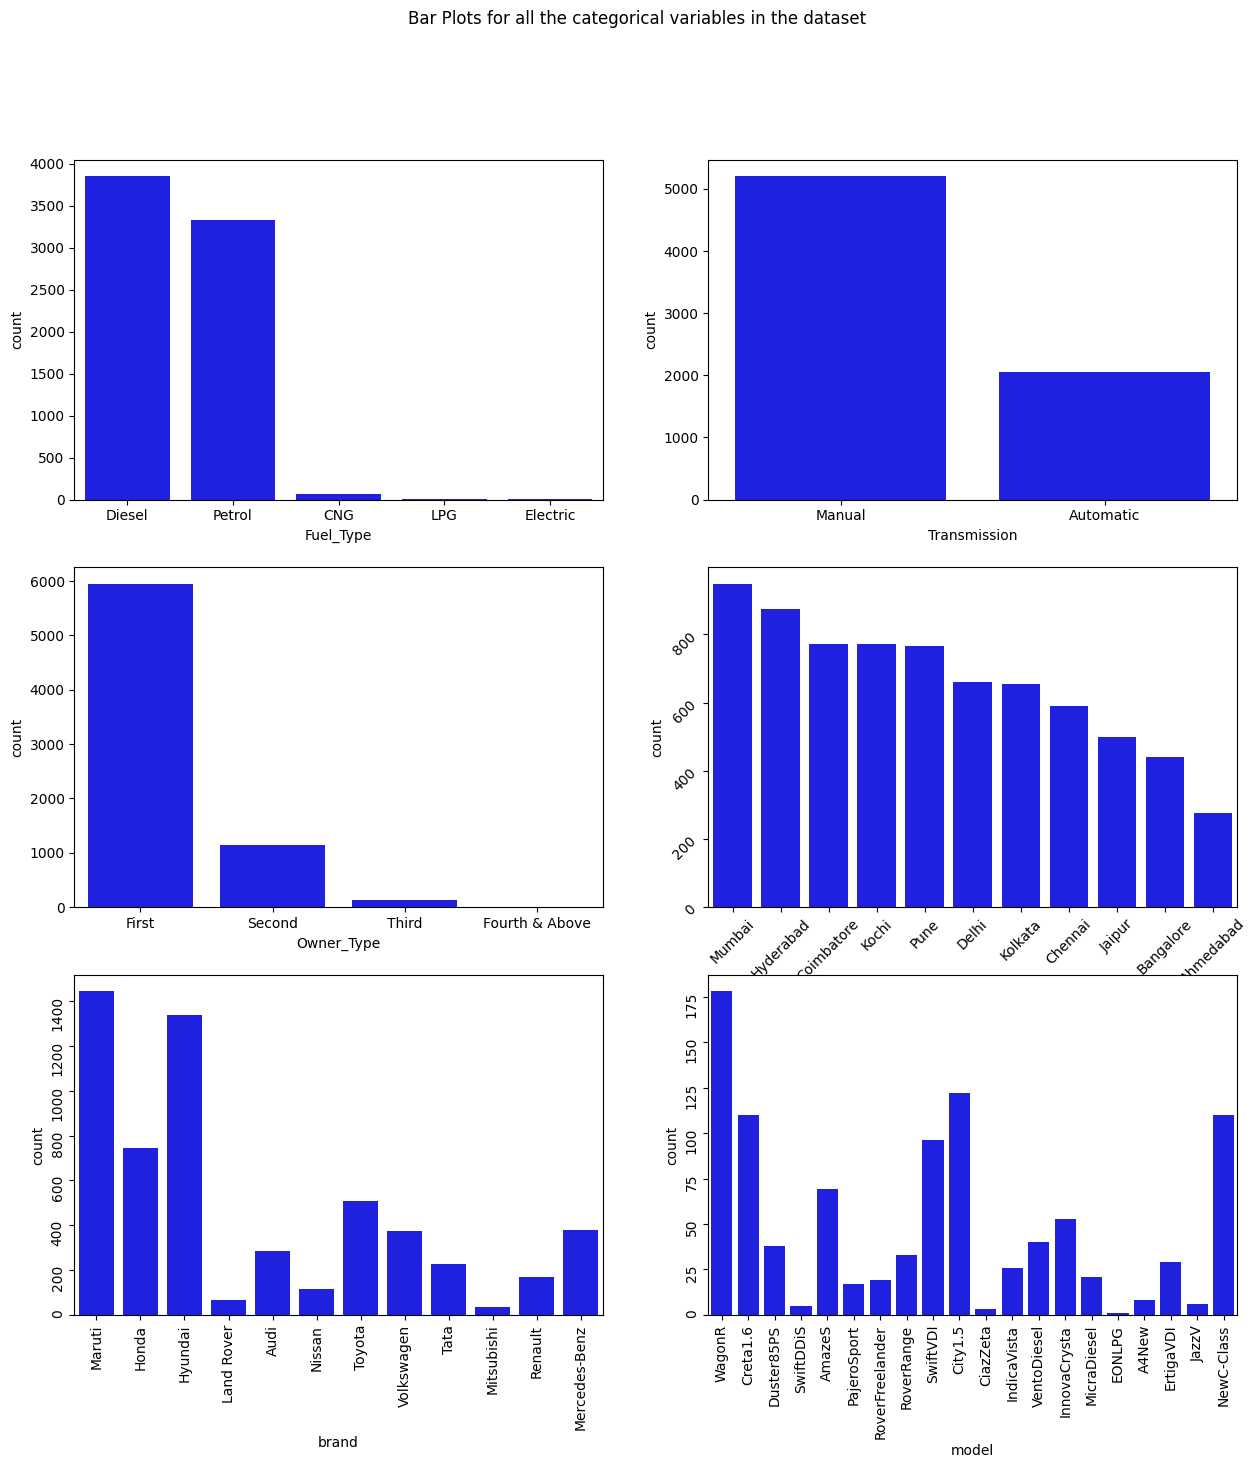

In [18]:
## Plotting bar plots of categorical variables against price of car.
## Categorical variables provide the pattern of factors influencing car price.
fig, axes = plt.subplots(3,2,figsize=(15,15))
plt.suptitle("Bar Plots for all the categorical variables in the dataset")
sns.countplot(ax=axes[0,0],x='Fuel_Type',data=df,color='blue',
             order=df['Fuel_Type'].value_counts().index);
sns.countplot(ax=axes[0,1],x='Transmission',data=df,color='blue',
             order=df['Transmission'].value_counts().index);
sns.countplot(ax=axes[1,0],x='Owner_Type',data=df,color='blue',
             order=df['Owner_Type'].value_counts().index);
sns.countplot(ax=axes[1,1],x='Location',data=df,color='blue',
             order=df['Location'].value_counts().index);
sns.countplot(ax=axes[2,0],x='brand',data=df,color='blue',
             order=df['brand'].head(20).value_counts().index);
sns.countplot(ax=axes[2,1],x='model',data=df,color='blue',
             order=df['model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation = 45);
axes[2][0].tick_params(labelrotation = 90);
axes[2][1].tick_params(labelrotation = 90);

### From the count plot, we can have below observations

    Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
    ~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance
    ~72% of cars have manual transmission
    ~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
    ~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai
    WagonR ranks first among all models which are available for purchase


## EDA Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

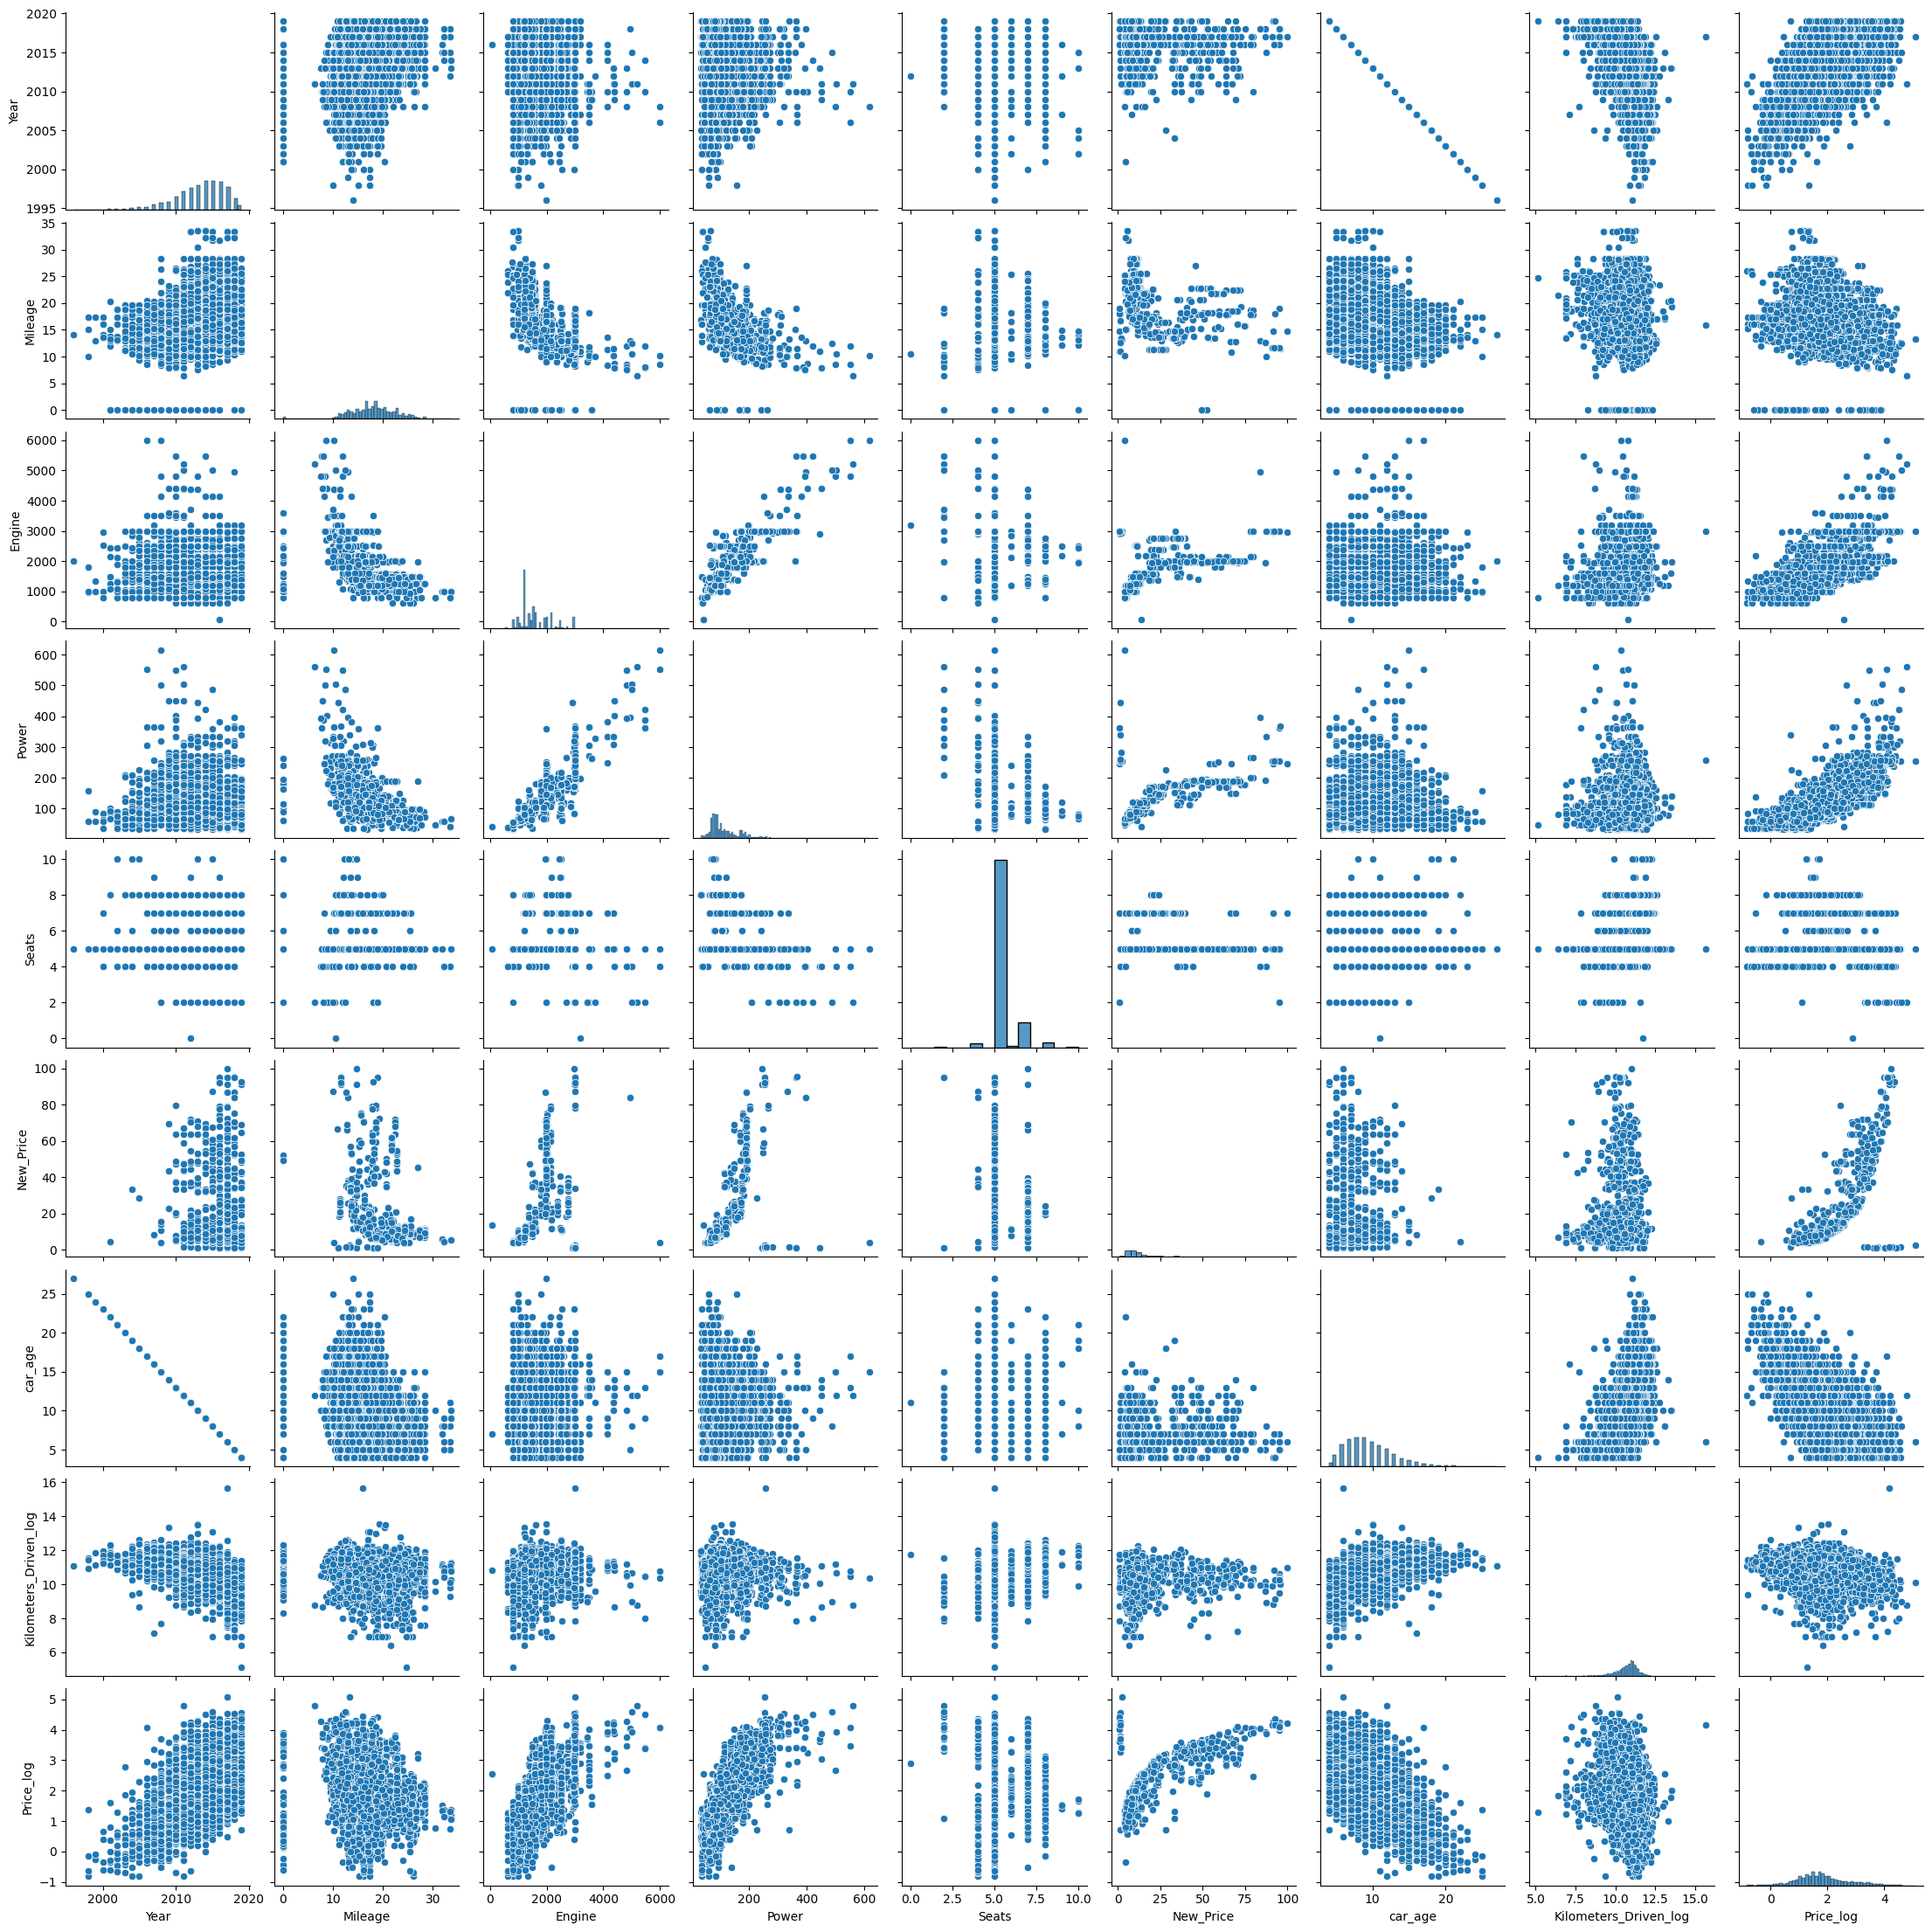

In [19]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['Kilometers_Driven','Price'],axis=1))

### Pair Plot provides below insights:

####    The variable Year has a positive correlation with price and mileage
####    A year has a Negative correlation with kilometers-Driven
####    Mileage is negatively correlated with Power
####    As power increases, mileage decreases
####    Car with recent make is higher at prices. As the age of the car increases price decreases
####    Engine and Power increase, and the price of the car increases


In [20]:
cat_cols

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'brand',
 'model']

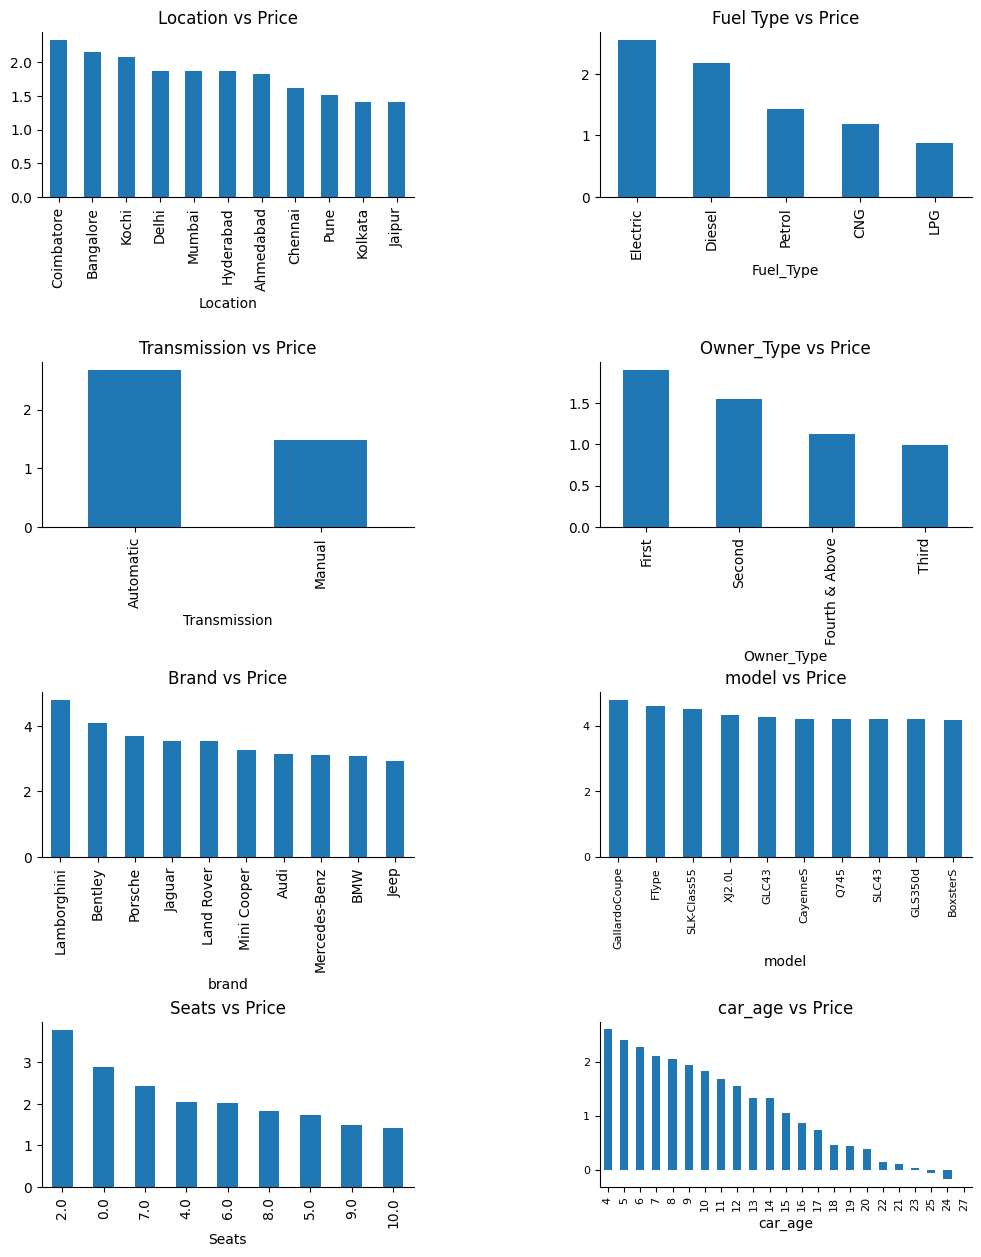

In [21]:
## A bar plot can be used to show the relationship between Categorical variables and continuous variables 
fig, axar=plt.subplots(4,2,figsize=(12,15))
df.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axar[0][0],fontsize=10)
axar[0][0].set_title('Location vs Price')
df.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axar[0][1],fontsize=10)
axar[0][1].set_title('Fuel Type vs Price')
df.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axar[1][0],fontsize=10)
axar[1][0].set_title('Transmission vs Price')
df.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axar[1][1],fontsize=10)
axar[1][1].set_title('Owner_Type vs Price')
df.groupby('brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axar[2][0],fontsize=10)
axar[2][0].set_title('Brand vs Price')
df.groupby('model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axar[2][1],fontsize=8)
axar[2][1].set_title('model vs Price')
df.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axar[3][0],fontsize=10)
axar[3][0].set_title('Seats vs Price')
df.groupby('car_age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axar[3][1],fontsize=8)
axar[3][1].set_title('car_age vs Price')
plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=0.5)
sns.despine()

## Observation : 
1. The price of cars high in Coimbatore and less price in Kolkata and Jaipur.
2. The price of Electric and diesel cars are high.
3. Automatic cars are expensive than manual cars.
4. The price of First owner of cars are higher followed by second owners.
5. Prices of Third and Fourth above car owners are relatively lower.
6. Lamborghini is the most expensive car brand.
7. Gallardocoupe is the highest in the price.
8. 2 seater cars are the expensive ones followed by 7 seaters.
9. Price of the cars decrease relatively with increase in the car age.

## EDA Multivariate Analysis

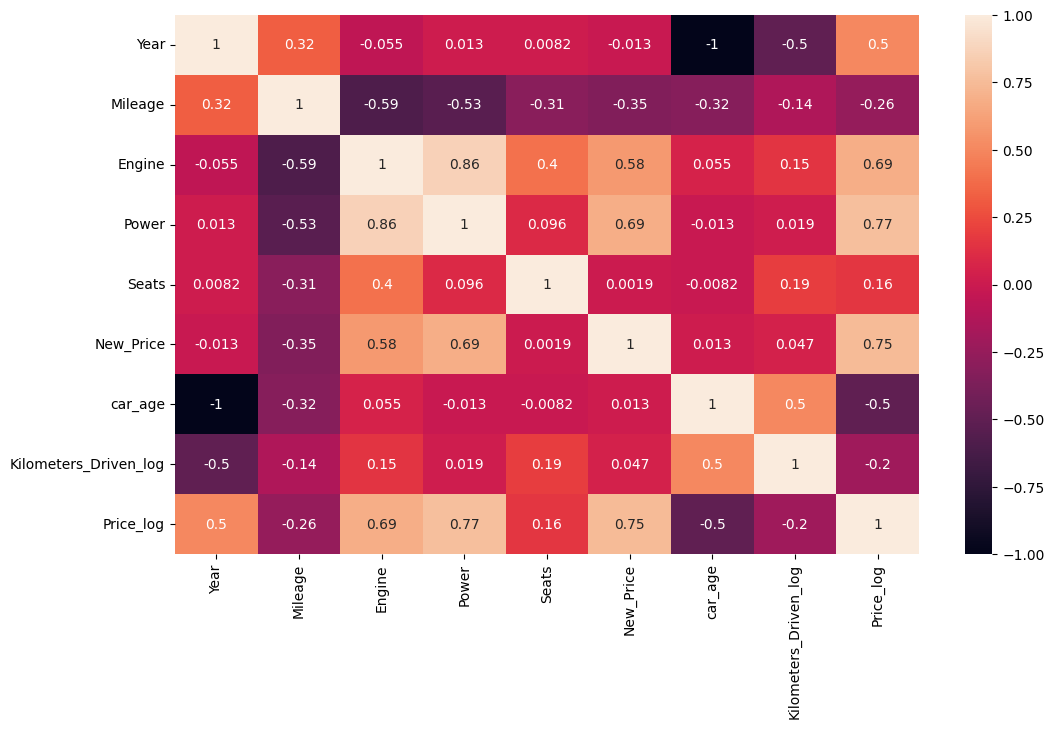

In [22]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

### From the Heat map, we can infer the following:

    The engine has a strong positive correlation to Power 0.86
    Price has a positive correlation to Engine 0.69 as well Power 0.77
    Mileage has correlated to Engine, Power, and Price negatively
    Price is moderately positive in correlation to year.
    Kilometer driven has a negative correlation to year not much impact on the price
    Car age has a negative correlation with Price
    car Age is positively correlated to Kilometers-Driven as the Age of the car increases; then the kilometer will also   increase of car has a negative correlation with Mileage this makes sense


#### We observed earlier some observations have zero Mileage. This looks like a data entry issue. We could fix this by filling null values with zero and then the mean value of Mileage since Mean and Median values are nearly the same for this variable chosen Mean to impute the values.

In [23]:
df.loc[df["Mileage"]==0.0,'Mileage']=np.nan
df.Mileage.isnull().sum()

df['Mileage'].fillna(value=np.mean(df['Mileage']),inplace=True)

#### Similarly, imputation for Seats. As we mentioned earlier, we need to know common insights about the data.

#### Let’s assume some cars brand and Models have features like Engine, Mileage, Power, and Number of seats that are nearly the same. Let’s impute those missing values with the existing data:

In [24]:
df.Seats.isnull().sum()
df['Seats'].fillna(value=np.nan,inplace=True)
df['Seats']=df.groupby(['model','brand'])['Seats'].apply(lambda x:x.fillna(x.median()))
df['Engine']=df.groupby(['brand','model'])['Engine'].apply(lambda x:x.fillna(x.median()))
df['Power']=df.groupby(['brand','model'])['Power'].apply(lambda x:x.fillna(x.median()))

## Conclusion:

#### Through EDA, we got useful insights, and below are the factors influencing the price of the car and a few takeaways

    Most of the customers prefer 2 Seat cars hence the price of the 2-seat cars is higher than other cars.
    The price of the car decreases as the Age of the car increases.
    Customers prefer to purchase the First owner rather than the Second or Third.
    Due to increased Fuel price, the customer prefers to purchase an Electric vehicle.
    Automatic Transmission is easier than Manual.
